<a href="https://colab.research.google.com/github/Wqcapstone1234/Enhancing-Basic-VIX-Strategy/blob/main/MScFE_690_Capstone_Code_Group_9171.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
#Libraries
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

from ta.momentum import RSIIndicator

# Data Collection

In [ ]:
start_date = datetime.date(2020, 1, 1)
end_date   = datetime.date(2024, 12, 31)
VOO        = yf.download(['VOO'], start_date, end_date)
VIX        = yf.download(['^VIX'], start_date, end_date)
VOO_close  = VOO[['Close']]
VIX_close  = VIX[['Close']]
print(VIX_close.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price       Close
Ticker       ^VIX
Date             
2020-01-02  12.47
2020-01-03  14.02
2020-01-06  13.85
2020-01-07  13.79
2020-01-08  13.45


# Exploratory Data Analysis

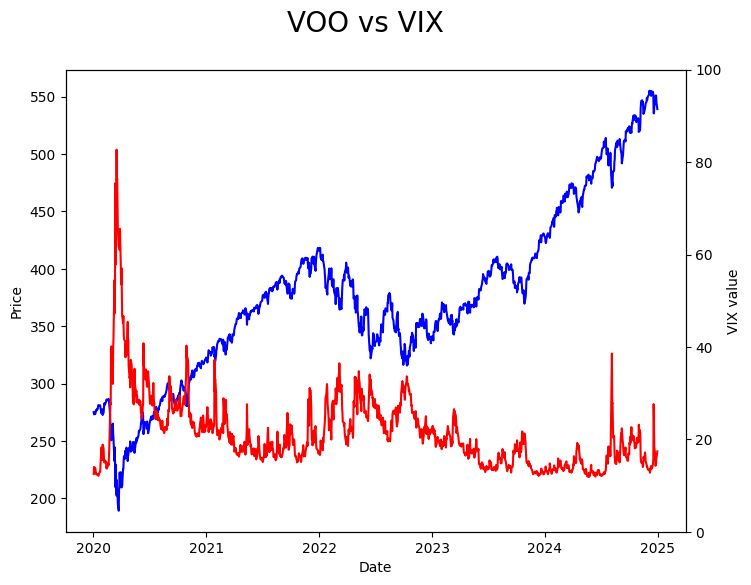

In [ ]:
df = pd.concat([VOO['Close'], VIX['Close']],axis=1)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax2.set_ylim(0, 100)
ax1.plot(df.index,df['VOO'],color ='b')
ax2.plot(df.index, df['^VIX'],color = 'r')


ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax2.set_ylabel("VIX value")

fig.suptitle("VOO vs VIX", fontsize=20)
plt.show()

In [ ]:
df_returns = df
df_returns['VOO pct change'] = df_returns['VOO'].pct_change()
df_returns['VIX pct change'] = df_returns['^VIX'].pct_change()
df_returns = df_returns.dropna()
df_returns = df_returns.drop(columns = ['VOO', '^VIX'])
print(df_returns.head())

Ticker      VOO pct change  VIX pct change
Date                                      
2020-01-03       -0.007305        0.124298
2020-01-06        0.003747       -0.012126
2020-01-07       -0.002757       -0.004332
2020-01-08        0.005160       -0.024656
2020-01-09        0.006911       -0.067658


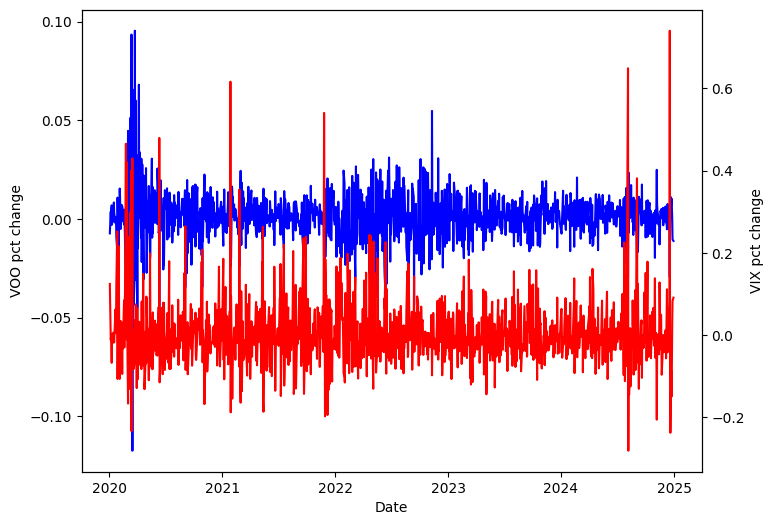

In [ ]:
ig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax1.plot(df_returns.index,df_returns['VOO pct change'],color ='b')
ax2.plot(df_returns.index, df_returns['VIX pct change'],color = 'r')


ax1.set_xlabel("Date")
ax1.set_ylabel("VOO pct change")
ax2.set_ylabel("VIX pct change")

fig.suptitle("VOO vs VIX pct change", fontsize=12)
plt.show()

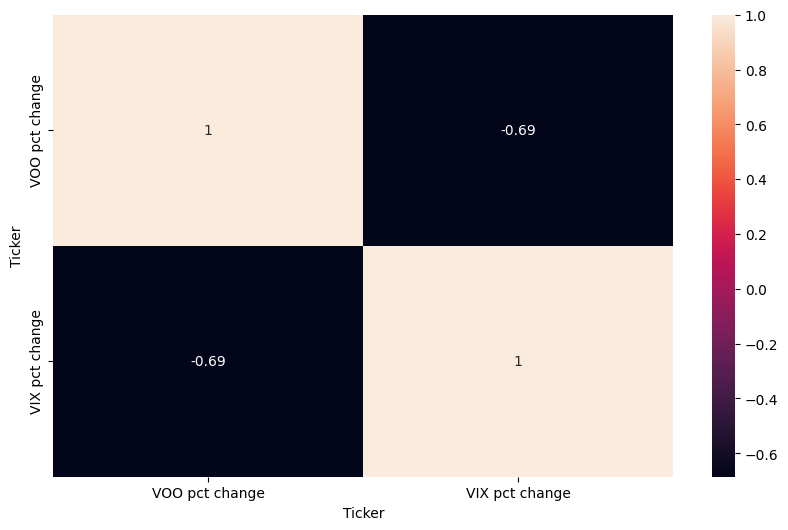

In [ ]:
#Plot correlation matrix for all variables
plt.figure(figsize=(10,6))
c = df_returns.corr()
sns.heatmap(c, annot=True)
plt.show()

# Feature Engineering

In [ ]:
df['VIX SMA 20']  = df['^VIX'].rolling(20).mean()
df['buy signal']  = df['^VIX'] < df['VIX SMA 20']
df['sell signal'] = df['^VIX'] > df['VIX SMA 20']
print(df.tail())

Ticker             VOO       ^VIX  VOO pct change  VIX pct change  VIX SMA 20  \
Date                                                                            
2024-12-23  545.299500  16.780001        0.007158       -0.086057     15.4900   
2024-12-24  550.910034  14.270000        0.010289       -0.149583     15.4735   
2024-12-26  550.900024  14.730000       -0.000018        0.032235     15.5050   
2024-12-27  545.189880  15.950000       -0.010365        0.082824     15.5975   
2024-12-30  539.120850  17.400000       -0.011132        0.090909     15.7920   

Ticker      buy signal  sell signal  
Date                                 
2024-12-23       False         True  
2024-12-24        True        False  
2024-12-26        True        False  
2024-12-27       False         True  
2024-12-30       False         True  


# RSI

In [ ]:
df_RSI                   = df
df_RSI ['VOO RSI 7']     = RSIIndicator(close = df['VOO'], window =7).rsi()
df_RSI ['VIX RSI 7']     = RSIIndicator(close = df['^VIX'], window =7).rsi()
df_RSI ['VOO RSI 14']    = RSIIndicator(close = df['VOO'], window =14).rsi()
df_RSI ['VIX RSI 14']    = RSIIndicator(close = df['^VIX'], window =14).rsi()
df_RSI ['VOO RSI 35']    = RSIIndicator(close = df['VOO'], window =35).rsi()
df_RSI ['VIX RSI 35']    = RSIIndicator(close = df['^VIX'], window =35).rsi()
df_RSI                   = df_RSI[['VOO RSI 7','VIX RSI 7','VOO RSI 14','VIX RSI 14','VOO RSI 35','VIX RSI 35']]
print(df_RSI.tail())

Ticker      VOO RSI 7  VIX RSI 7  VOO RSI 14  VIX RSI 14  VOO RSI 35  \
Date                                                                   
2024-12-23  48.212089  48.004963   50.264922   50.275856   55.120774   
2024-12-24  58.206918  41.527955   55.984118   45.559494   57.411745   
2024-12-26  58.183545  43.167470   55.971752   46.549118   57.406363   
2024-12-27  45.913429  47.704590   49.283807   49.187320   54.411054   
2024-12-30  36.395973  52.916607   43.354368   52.206669   51.472598   

Ticker      VIX RSI 35  
Date                    
2024-12-23   49.915879  
2024-12-24   47.343191  
2024-12-26   47.850267  
2024-12-27   49.186222  
2024-12-30   50.730464  
